In [1]:
import pyautogui
from pynput.keyboard import Key, Listener
import numpy as np
from time import sleep
from PIL import Image
#from IPython.display import Image as IPImage
# IPImage(filename='test_1.png')
import matplotlib.pyplot as plt

In [2]:
def normalise_img(pixels):
    pixels = pixels.astype('float32')
    pixels = (pixels/pixels.max())*255
    #print('Data Type: %s' % pixels_1.dtype)
    #print('Min: %.2f, Max: %.2f' % (pixels_1.min(), pixels_1.max()))
    return pixels    

In [6]:
def subtract_img(img_a, img_b):
    
    pixels_a = np.asarray(image_org_a)    
    pixels_b = np.asarray(image_org_b)
    pixels_a = normalise_img(pixels_a)
    pixels_b = normalise_img(pixels_b)
    pixels_ab = pixels_test =  pixels_a - pixels_b
    pixels_ab[pixels_ab<0]=0
    return Image.fromarray(np.uint8(pixels_test)) 

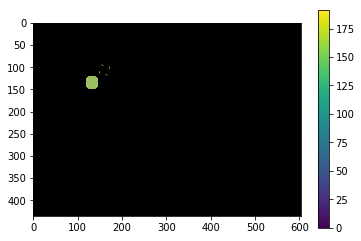

In [8]:
img_a = 'test_1.png'
img_b = 'test_2.png'
image_org_a = Image.open(img_a)
image_org_b = Image.open(img_b)
pixels_a = np.asarray(image_org_a)    
pixels_b = np.asarray(image_org_b)

plt.imshow(subtract_img(img_a, img_b))
plt.colorbar()
plt.show()

In [11]:
import imageio as iio
from skimage import filters
from skimage.color import rgb2gray  # only needed for incorrectly saved images
from skimage.measure import regionprops

image = rgb2gray(iio.imread('test_1.png'))
threshold_value = filters.threshold_otsu(image)
labeled_foreground = (image > threshold_value).astype(int)
properties = regionprops(labeled_foreground, image)
center_of_mass = properties[0].centroid
weighted_center_of_mass = properties[0].weighted_centroid

print(center_of_mass)

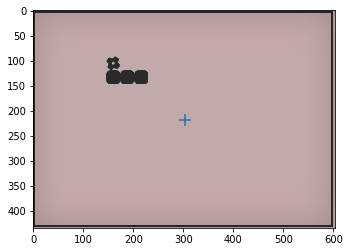

In [10]:
import matplotlib.pyplot as plt
from skimage.color import label2rgb

colorized = label2rgb(labeled_foreground, image, colors=['black', 'red'], alpha=0.1)
fig, ax = plt.subplots()
ax.imshow(colorized)
# Note the inverted coordinates because plt uses (x, y) while NumPy uses (row, column)
ax.scatter(center_of_mass[1], center_of_mass[0], s=160, c='C0', marker='+')
plt.show()

# B

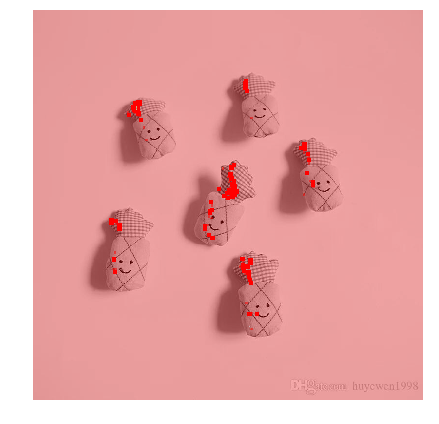

In [47]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb

image = rgb2gray(iio.imread('other_test_1.png'))
thresh = threshold_otsu(image)
bw = closing(image > thresh, square(3))
cleared = clear_border(bw)

label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 0:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=3)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

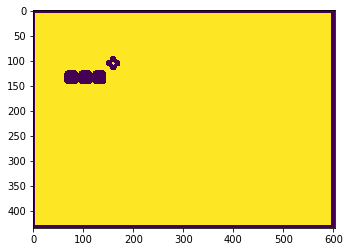

In [27]:
plt.imshow(cleared)
plt.show()

In [42]:
regionprops(label_image)

In [43]:
thresh

54.478315938470864